一般来说对于连续型数值做回归问题，效果没有预测分类那么好，我们一般会把连续型属性转换成离散型。

为什么选择sigmoid函数作为将连续值映射到[0,1]内，这可能和它的数学性质有关，因为它求导之后和原来的式子相关度非常高。

这是一个解决分类问题的算法
* 线性回归 + 阈值？ 

<img src='723_xianxing.png'>

阈值很难定，受噪声点干扰

<img src='723_xian.png'>

## 逻辑回归 

线性回归如何变成逻辑回归：

在线性回归中，一般我们通过z=ax+b进行划分，但是这样的话如果数据中存在噪声点，那么阈值其实很难确定。这时候通过sigmoid函数，我们将z映射成[0,1]之间的一个值，这时候就可以这样进行分类，一般是小于0.5的值的点作为一类，大于0.5的值的点作为另一类。这样就不需要通过线性回归去找一个绝对的阈值。

**归功于sigmoid **

<img src='723_sigmoid.png'>

### 判定边界 

<img src='723_panding.png'>

<img src='723_pan2.png'>

<img src='723_pan3.png'>

### 线性判定边界

<img src='723_xian4.png'>

**线性判定边界**：(只需要一条直线就可以分开)

之前我们讲到，如果按照线性回归y=ax+b进行划分，需要自己手动设置阈值，如果数据中存在噪声，那么设定的阈值可能效果不好。

当使用逻辑回归以后，sigmoid>0.5,归为一类，sigmoid<0.5归为一类。也就是说在y=ax+b中，y>0为一类，y<0为一类。这样效果就会好很好。这时候我们需要对a和b进行取值，直到取到一个比较的值可以把两类分的比较好。

### 非线性判定边界 

<img src='723_not_xian.png'>

非线性判定边界：

z对应的是一条曲线（圆），按照圆进行划分

**如果遇到非线性判定边界的曲线非常复杂，那么就是多项式比较复杂**。

**逻辑回归的答题思路：找到一条曲线，这条曲线可以把两类样本点进行区分**如果是线性，则用Y=AX+B直线进行划分，如果是非线性，我们则造出一些高次项的函数进行划分，只要曲线足够的弯曲，理论上总有办法可以把两类样本点分开。

如果次项过高可能会出现过拟合现象，一般最高是二次项

前面讲的参数都是自己选择的，所以效果非常好，**但是我们需要做的就是学习到一组最好的参数来满足分类的要求**

这就需要用到损失函数：用来评估你预测的结果和实际结果之间的差距有多大，我们的目的就是让损失值最小

比如说：**梯度下降法**（下山，如何快速到达山底，也就是最小值）

### 损失函数

$$
J(\theta)=\frac{1}{m} \sum_{i=1}^{m} \frac{1}{2}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
$$

<img src='723_sunshi.png'>

我们希望是下面这个样子的 

<img src='723_sunshi2.png'>

这样可以找到全局最优解，也就是局部最低点，不过也是相对而言的。

### 损失函数方程

$$
\operatorname{cost}\left(h_{\theta}(x), y\right)=\left\{\begin{aligned}-\log \left(h_{\theta}(x)\right) & \text { if } y=1 \\-\log \left(1-h_{\theta}(x)\right) & \text { if } y=0 \end{aligned}\right.
$$

如何理解这个式子呢？

if y=1,实际上是正样本，假设我们预测的是负样本，设值$h_{\theta}(x)$=0.01(sigmoid值为0.01，那么映射概率之前的值是小于0的也就是负样本)，这时候$-\log \left(h_{\theta}(x)\right)$是一个非常大的值，也就是说给了一个非常大的损失值，因为你预测的结果和实际上相差非常大。

同理
if y=0,实际上是负样本，假设我们预测的是正样本，设值$h_{\theta}(x)$=0.99(sigmoid值为0.99，那么映射概率之前的值是大于0的也就是正样本)，这时候$-\log \left(h_{\theta}(x)\right)$也是一个非常大的值，也就是说给了一个非常大的损失值，因为你预测的结果和实际上相差非常大。

**我们可以合并上面的损失函数方程**

$$
\begin{aligned} J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \operatorname{cost}\left(h_{\theta}\left(x^{(i)}\right), y^{(i)}\right) \\ &=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{(i)} \log h_{\theta}\left(x^{(i)}\right)-\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right] \end{aligned}
$$

**我们为了防止过拟合,还需要在后面加上正则化项**

$\frac{\lambda}{2 m} \sum_{j=1}^{n} \theta_{j}^{2}$

正则化项：可以让曲线更加平滑，抖动不那么强烈。总体来说是为了防止过拟合

**这样最终的损失函数方程变为**


$$
J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{(i)} \log h_{\theta}\left(x^{(i)}\right)-\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]+\frac{\lambda}{2 m} \sum_{j=1}^{n} \theta_{j}^{2}
$$

### 梯度下降求最小值 


$$
J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{(i)} \log h_{\theta}\left(x^{(i)}\right)-\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]+\frac{\lambda}{2 m} \sum_{j=1}^{n} \theta_{j}^{2}
$$

$$
\theta_{j} :=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$

$\theta_{j}$为一开始我们定义的初始位置，通过对初始位置减去$J(\theta)$求导乘以$\alpha$补偿之后，我们得到一个新的位置，这个位置是比原来的位置要低的，循环这样，就可以得到一个靠近全部最低点的值。

### 二分类与多分类 

**如何进行多分类的划分：本质是进行多个二分类的划分**

如果是多分类，比如右图对三角形、正方形和叉号进行三分类。我们会画三个超平面，第一个判断是不是三角形（二分类），第二个判断是不是正方形，第三个判断是不是叉号。举个例子来说，最终得到的结果：P（三角形）=0.8，P(正方形)=0.6，P(叉号)=0.1,那么说明我们选择的这个样本是三角形的概率最大。

<img src='724_duo.png'>

### 逻辑回归示例1：线性决策边界 

地址：https://github.com/HanXiaoyang/ML-examples/tree/master/

In [18]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')

In [19]:
#家在数据集
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[0:6,:])
    return(data)

In [20]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [22]:
data = loaddata('./logistic_regression/data1.txt', ',')

Dimensions:  (100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [26]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]] #np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
#将三个参数对应的X值求出
y = np.c_[data[:,2]]#正负样本
X.shape

(100, 3)

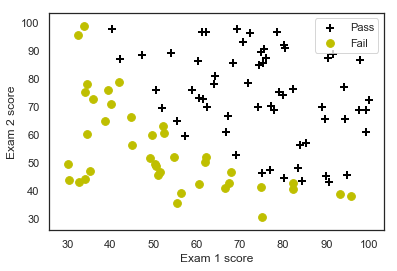

In [27]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Pass', 'Fail') #划分出正负样本

#### 逻辑斯特回归假设
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [29]:
#定义sigmoid函数
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

其实scipy包里有一个函数可以完成一样的功能:<BR>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit

#### 损失函数
#### $$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\, log\,( h_\theta\,(x^{(i)}))+(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

#### 向量化的损失函数(矩阵形式)
#### $$ J(\theta) = -\frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [32]:
#定义损失函数
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return J[0]

#### 求偏导(梯度)

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
<img src='724_calc.png'>
#### 向量化的偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


In [33]:
#求解梯度   对每个参数都求梯度，所以输出三个值
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))#X进行转置，经过求导重新计算出三个参数
    
    grad =(1.0/m)*X.T.dot(h-y)

    return(grad.flatten())

In [34]:
initial_theta = np.zeros(X.shape[1]) #定义三个参数都为0
cost = costFunction(initial_theta, X, y) #我们随机设置了三个参数都为0，第一次计算出损失值
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


#### 最小化损失函数

In [35]:
res = minimize(costFunction, initial_theta, args=(X,y), jac=gradient, options={'maxiter':400}) #最优化400次
res

      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557620e-09,  4.36433485e-07, -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [36]:
res.x.T #得出在最小化损失函数下得到的一组参数

array([-25.16131634,   0.2062316 ,   0.20147143])

#### 做一下预测吧

In [37]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

#### 咱们来看看考试1得分45，考试2得分85的同学通过概率有多高

In [38]:
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.7762903249331021

#### 画决策边界

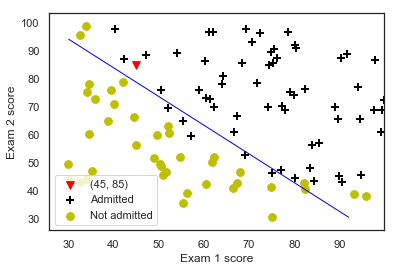

In [53]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))#生成网格点坐标矩阵
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x)) #ravel将多维数组降维1维
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')#画出决策边界

### 加正则化项的逻辑斯特回归

In [54]:
data2 = loaddata('./logistic_regression/data2.txt', ',')

Dimensions:  (118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [57]:
# 拿到X和y
y = np.c_[data2[:,2]]
X = data2[:,0:2]

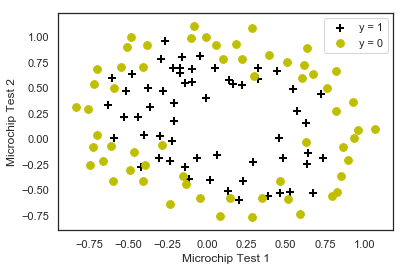

In [58]:
# 画个图   发现不是线性数据，这时候我们就需要构造特征。只有非线性才可以划分这样的数据
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

#### 咱们整一点多项式特征出来(最高6阶)

In [60]:
#from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
# 看看形状(特征映射后x有多少维了)
print(XX.shape)

(118, 28)


array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

#### 正则化后损失函数
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### 向量化的损失函数(矩阵形式)
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [61]:
# 定义损失函数
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2.0*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

#### 偏导(梯度)

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### 向量化的偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$
##### $$\text{注意，我们另外自己加的参数 } \theta_{0} \text{ 不需要被正则化}$$

In [62]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1.0/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [63]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.6931471805599454

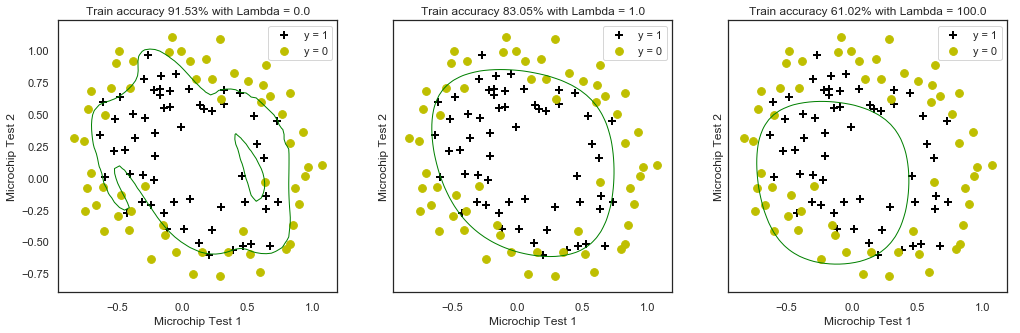

In [64]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，咱们分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 卧槽，正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0.0, 1.0, 100.0]): 
    # 最优化 costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter':3000})
    
    # 准确率
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # 对X,y的散列绘图
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

## SVM与 分类 

在很多项目中，SVM使用场景不是很多

SVM典型的分类算法

SVM需要找到一条最好的分界线，使它的鲁棒性最强

也就是超平面离它最近的点之间的距离最大

**离超平面最近的点称为支持向量**

<img src='724_he.png'>

从第一行图中可以看出超平面的鲁棒性不是很好，左边出现了一个红色的点，而第二行的超平面鲁棒性（容错能力较强）比较好

<img src='724_lu.png'>

从图中可以看出，有很多线可以划分这两类数据，但是中油红色的超平面最好，因为只有超平面是红色的直线时，两边离它最近的点(支持向量)到超平面的距离最远

<img src='724_hehan.png'>

当然也存在线性不可分的情况，这时候就需要核函数。

**核函数**（线性不可分情况）：原本数据在二维平面上找不到一条超平面可以把数据划分开，这时候我们需要将二维平面映射成三维平面，这样就可以找到一条超平面分类，并且再把这个超平面映射到二维空间，形成一条曲线。

### SVM 分类与核函数应用案例 

In [65]:
import numpy as np
import pylab as pl

**支持向量机有两种：SVC，支持向量分类，用于分类问题；SVR,支持向量回归，用于回归问题**。

In [66]:
from sklearn import svm

### 线性支持向量机（Linear SVMs）:一些感性认识

我们采用一个非常有名的用于分类问题的数据集：鸢尾花数据集。它是基于鸢尾花的花萼的长度和宽度进行分类的。我们只用其中两维特征，这能够方便可视化。

In [86]:
svc = svm.SVC(kernel='linear')
# 鸢尾花数据集是sklearn自带的。
from sklearn import datasets
iris = datasets.load_iris()
# 只提取前面两列数据作为特征
X = iris.data[:, :2]
y = iris.target
# 基于这些数据训练出一个支持向量分离器SVC
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**将预测结果可视化**

In [93]:
from matplotlib.colors import ListedColormap

# 因为鸢尾花是3分类问题，我们要对样本和预测结果均用三种颜色区分开。
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    这个函数的作用是基于分类器，对预测结果与原始标签进行可视化。
    '''
    estimator.fit(X, y)
    # 确定网格最大最小值作为边界
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # 产生网格节点   https://blog.csdn.net/lllxxq141592654/article/details/81532855
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #将x_min到x_max之间的数字均匀的分成100份
                         np.linspace(y_min, y_max, 100))
    # 基于分离器，对网格节点做预测
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])#np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等

    # 对预测结果上色
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 同时对原始训练样本上色
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()

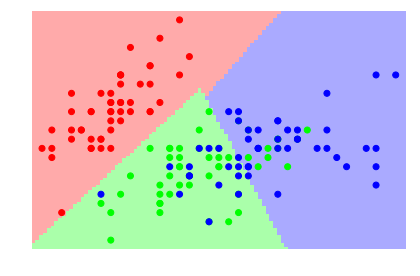

In [94]:
plot_estimator(svc, X, y)

* 正如我们所见，`kernel="linear"`（线性核函数）给了我们线性的决策边界：两类之间的分离边界是直线。
* 多分类的工作方式就是"one versus one" ：在任意两类样本之间设计一个SVM，因此k个类别的样本就需要设计k(k-1)/2个SVM。当对一个未知样本进行分类时，最后得票最多的类别即为该未知样本的类别。
* **线性支持向量分类器（LinearSVC）**：对于线性核函数，有一个新的对象`LinearSVC` ，它使用了不同的算法。在某些数据集上运行地更快（比如稀疏数据集，文本挖掘就是典型的例子）。它对于多分类采用的是"one versus all"策略。

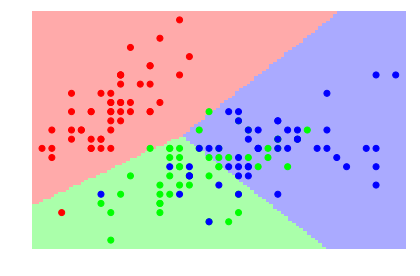

In [95]:
plot_estimator(svm.LinearSVC(), X, y)

###  支持向量与正则化

* **支持向量**：就是最靠近分离边界的样本点。支持向量机的工作方式就是找到这些支持向量，它们被认为是在二分类问题中最具代表性的样本点。
* 为了更方便的可视化，我们选择二分类问题，也就是只考虑鸢尾花数据集中的1类和2类样本。这两类不是线性可分的，所以我们可以看到更有趣的一些东西。
* 支持向量的坐标可以通过方法`support_vectors_`来找到。我们在图中将对它们着重标记。

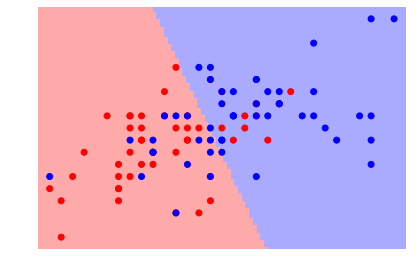

In [109]:
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]#选择出标签还有1和2的X和y对应的值
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, facecolors='none', zorder=10)

* **正则化** ：只考虑支持向量其实就是一种正则化的形式。实际上，它强迫模型在处理样本特征的时候变得更加简单。
* 正则项可以通过调整系数 *C* 来决定：
  - 小的C值：将会有很多支持向量。决策边界=类别A的平均值-类别B的平均值
  - 大的C值：将会有较少的支持向量。决策边界是被大多数支持向量所决定。

Text(0.5, 1.0, 'Low C values: high number of support vectors')

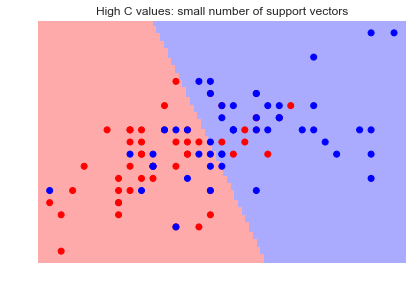

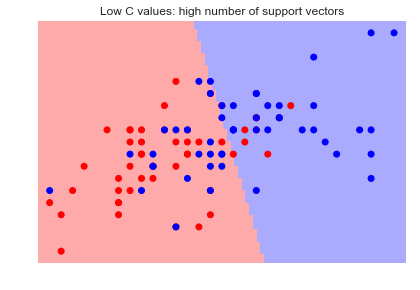

In [110]:
svc = svm.SVC(kernel='linear', C=1e3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('High C values: small number of support vectors')

svc = svm.SVC(kernel='linear', C=1e-3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('Low C values: high number of support vectors')

* 支持向量机的有个好处是对于许多数据集，默认参数'C=1'其实工作得很好。
* **实践经验：对样本正则化**： 对于许多分离器，采用标准差正则方法是非常重要的提升预测效果的手段。

### 核方法

采用核方法，能够很方便地产生非线性分类边界。

- **linear**，线性核，会产生线性分类边界。一般来说它的计算效率最高，而且需要数据最少。
- **poly** ，多项式核，会产生多项式分类边界。
- **rbf**，径向基函数，也就是高斯核，是根据与每一个支持向量的距离来决定分类边界的。它的映射到无线维的。它是最灵活的方法，但是也需要最多的数据。

Text(0.5, 1.0, 'RBF kernel')

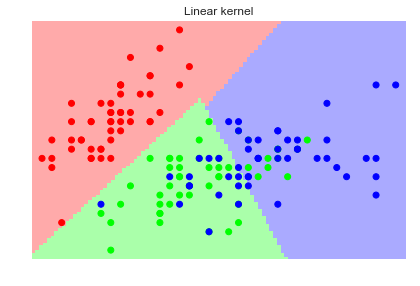

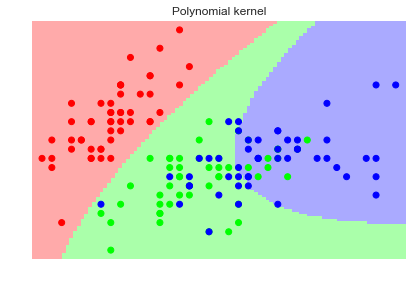

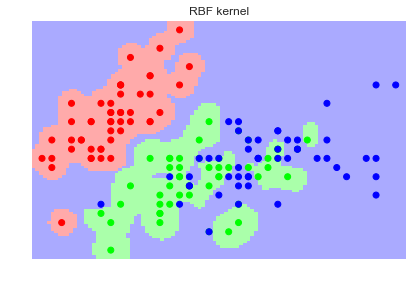

In [112]:
X = iris.data[:, :2]
y = iris.target

svc = svm.SVC(kernel='linear')
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('Linear kernel')

svc = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('Polynomial kernel')

svc = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('RBF kernel')

我们可以看到，高斯核更灵活，而且对于训练数据效果是最好的。但是要担心过拟合。

### scikit-learn与svm

主要介绍以下2个方面的内容

* 支持向量机分类器
* 支持向量机与核函数

In [171]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
seaborn.set()

### 支持向量机分类器

支持向量机是解决**分类** 和 **回归** 问题非常强大的有监督学习算法。简单说来，linear的SVM做的事情就是在不同类别的“数据团”之间划上一条线，用以分界，但是只划线是远远不够的，SVM试图找到一条最健壮的线，什么叫做最健壮的线？其实就是离2类样本点最远的线。

(-1, 3.5)

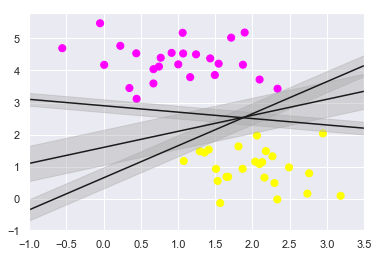

In [172]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)#默认50份均分
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# 其实随意给定3组参数，就可以画出3条不同的直线，但它们都可以把图上的2类样本点分隔开
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Fit the model:

In [173]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

画出决策边界：

In [174]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.c_[xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

sklearn的SVM里面会有一个属性``support_vectors_``，标示“支持向量”，也就是样本点里离超平面最近的点，组成的。<br>
咱们来画个图，把超平面和支持向量都画出来。

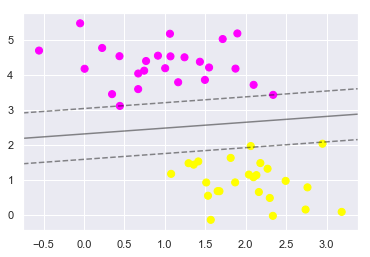

In [178]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=200, facecolors='none')

可以用IPython的``interact``函数来看看样本点的分布，会怎么样影响超平面:

In [180]:
from IPython.html.widgets import interact

def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10,100, 200], kernel='linear');

interactive(children=(Dropdown(description='N', index=1, options=(10, 100, 200), value=100), Output()), _dom_c…

### 支持向量机与核函数

对于非线性可切分的数据集，要做分割，就要借助于**核函数**了<br>
简单一点说呢，核函数可以看做对原始特征的一个映射函数，不过SVM不会傻乎乎对原始样本点做映射，它有更巧妙的方式来保证这个过程的高效性。<br>
下面有一个例子，你可以看到，线性的kernel(线性的SVM)对于这种非线性可切分的数据集，是无能为力的。

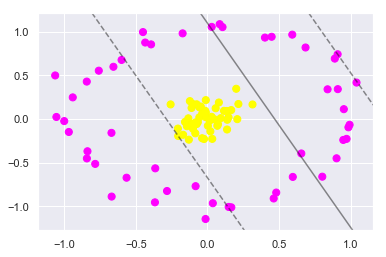

In [186]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)

然后强大的**高斯核/radial basis function**就可以大显身手了:

In [188]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…


你在上面的图上也可以看到，原本在2维空间无法切分的2类点，映射到3维空间以后，可以由一个平面轻松地切开了。<br>
而带rbf核的SVM就能帮你做到这一点:

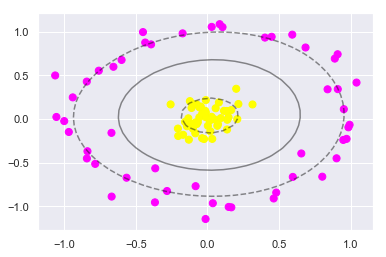

In [189]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

关于SVM的一些额外的小贴士:
* 除掉我们说的核函数选择，你在使用SVM的时候，一定要注意合适的参数设置，比如sklearn里面的c和gamma。你可以借助于交叉验证，在交叉验证集上选出效果最好的参数。
* 很遗憾的是，SVM是O(n^3)的时间复杂度。在sklearn里，LinearSVC是可扩展的(也就是对海量数据也可以支持得不错), 对特别大的数据集SVC就略微有点尴尬了。不过对于特别大的数据集，你倒是可以试试采样一些样本出来，然后用rbf核的SVC来做做分类。

## 神经网络与 分类 

神经网络解决分类效果比较好



那么**神经网路刚好可以处理这个事情，用两条超平面通过逻辑运算，进行划分**。

所以神经网络可以很好的对样本点进行分类，不管样本点是什么样的分布

缺点：学习能力过强，容易过拟合。理论上，只要有两层隐层神经网络，都可以完成所有结果的判定。(可以进行且、或运算)

**神经网络最优化方法是SGD，而SGD要使用梯度，求梯度要借助BP算法**



**大家都知道神经网络长这样**

<img src='724_shen.png'>

### 从LR到神经网络

从逻辑回归到神经元『感知器』 

<img src='724_LR.png'>

这部分LR和神经网络其实是相同的，最后都是通过sigmoid映射成概率

### 浅层神经网络

添加少量隐层 => 浅层神经网络

<img src='724_little.png'>

### 深层神经网络

<img src='724_shenc.png'>

### 神经网络与分类

神经网络应用在分类问题中效果好

LR或者linear SVM，线性分割

<img src='724_fenlei.png'>

LR和SVM对于非线性可分，怎么处理的？

为什么不用它们？

为什么用神经网络：

因为在逻辑回归中你不知道要做什么样的**特征映射**(将数据从原始高维特征空间映射到低纬特征空间)来拿到最合适的曲线

理论上SVM可以通过kernal函数可以做非线性切分，但是速度比较慢。效果也不一定好。

需要手动构造一些特征。但是不知道如何构造特征，所以对于非线性可分数据来说，LR和SVM效果不一定好。

<img src='724_sdw.png'>

### 神经网络的非线性切分

非线性可分，怎么办？

<img src='724_yu.png'>

神经网络是通过**逻辑运算**来解决这个问题的

如左图所示，我们有×和圈两类样本点，可以看出样本是线性不可分的，找不到一条直线可以将他们分开。这时候我们想两条直线是不是可以分开呢？我们可以用两个分类器进行预测。如右图所示，左边直线上面预测的是圈，下面预测的是×，右边的直线上面预测的是×，下面预测的是圈。我们可以将两条直线做一个逻辑与(且)运算，两条直线里面所划分的一类是×，外面划分的是圈。

而神经网络恰好可以做到这个事情。

### 神经元完成『逻辑与』 

<img src='724_luoyu.png'>

我们设定一组参数，并且四个点分别是[0,0],[0,1],[1,0],[1,1]

根据设定的参数带进公式$h_{\theta}(x)=a\left(-30+20 x_{1}+20 x_{2}\right)$，然后得出四个值。这是作为第一组划分。

再设定一组参数，可以得到第二条划分的直线。

两者取交集，可以正确划分样本分类

### 直观如图所示

<img src='724_fenlei2.png'>

通过神经网络两种参数预测的分类线，进行逻辑与运算，得到正确的划分结果

### 神经元完成『逻辑或』 

<img src='724_huo.png'>

### 神经网络完成非线性切分

对线性分类器的『与』和『或』的组合

完美对平面样本点分布进行分类

<img src='724_and_or.png'>

我们先进行逻辑与运算：
<img src='724_and3.png'>

对于绿色部分，我们可以通过六组不同的参数，得到六个不同的判定直线进行划分，然后对这六组判定直线进行逻辑与运算，划分出我们要的绿色快

逻辑或运算：

我们通过逻辑与运算得到三块绿色块，对他们进行逻辑或运算，表示这三块中任意一块都是绿色块部分。

### 神经网络层数与分类理解 

<img src='724_list.png'>

无隐层：实际上就是感知器或者可以理解为逻辑回归。通过sigmoid函数进行映射，由一条直线进行划分。

单隐层：有一个隐层可以进行逻辑与运算，如对应图片所示，两条直线进行逻辑与运算，中间的A为一类，两边的B为一类

双隐层：双隐层可以进行逻辑与和逻辑或运算，理论上任意形状都可以划分出来。并且一般只要两层就够了，如果数据量过大，可以通过增加节点来解决。

### 神经网络之 BP算法 

BP算法，也叫δ算法

以3层的感知器为例

<img src='724_yinceng.png'>

神经网络最优化方法叫SGD，而SGD需要使用到梯度，求梯度需要用到BP算法

输出层
$$
E=\frac{1}{2}(d-O)^{2} \quad=\frac{1}{2} \sum_{\kappa=1}^{\ell}\left(d_{k}-o_{k}\right)^{2}
$$

误差展开至隐层
$$
E=\frac{1}{2} \sum_{\kappa=1}^{\ell}\left[d_{\kappa}-f\left(n e t_{\kappa}\right)\right]^{2} \quad=\frac{1}{2} \sum_{\kappa=1}^{\ell}\left[d_{\kappa}-f\left(\sum_{j=0}^{m} \omega_{j k} y_{j}\right)\right]^{2}
$$

展开至输入层
$$
E=\frac{1}{2} \sum_{\kappa=1}^{\ell} d_{\kappa}-f\left[\sum_{j=0}^{m} \omega_{j k} f\left(n e t_{j}\right)\right] \quad=\frac{1}{2} \sum_{\kappa=1}^{\ell} d_{\kappa}-f\left[\sum_{j=0}^{m} \omega_{j k} f\left(\sum_{j=0}^{n} v_{i j} \chi_{i}\right)\right]^{2}
$$

误差E有了，怎么调整权重让误差不断减小？

随机梯度下降，梯度怎么算？
$$
\Delta \omega_{j \kappa}=-\eta \frac{\partial E}{\partial \omega_{j \kappa}} j=0,1,2, \ldots, m ; \quad \kappa=1,2, \ldots, \ell
$$
$$
\Delta v_{i j}=-\eta \frac{\partial E}{\partial v_{i j}} i=0,1,2, \ldots, n ; \quad j=1,2, \ldots, m
$$

h个隐层呢？
$$
\Delta \omega_{p q}^{1}=\eta \delta_{q}^{1} \chi_{p}=\eta\left(\sum_{r=1}^{m_{2}} \delta_{r}^{2} \omega_{q r}^{2}\right) y_{q}^{1}\left(1-y_{q}^{1}\right) \chi_{p} p=0,1,2, \ldots, n ; \quad j=1,2, \ldots, m_{1}
$$


### 神经网络之 示例 

人工神经网络其实在很久以前就被提出来了，苦于**当时没有足够强大的硬件**(比如现在铺天盖地的GPU)去支撑理论的实践（其实还有一部分原因是面对图像这样的高维数据，**最初的神经网络确实没有做卷积神经网络**这样特殊的处理，从而参数极大），因此消停了非常长的时间。<br><br>
当然，它的热度在近两年被推到了一个近乎极端的状态，似乎是个好点的实验室，是个大型点的互联网公司，不说自己会点深度学习和神经网络都不好意思说自己是这个圈子里混的。当然，媒体的炒作是一方面啦，但是神经网络确实在近期的一些任务中表现出了非常强势的优势。<br><br>
比如在很多分类问题中，样本是不可线性切分的，那特征的处理就尤为重要了，有意思的是，这正是神经网络所擅长的，在每一次的前向计算过程中，就在自动地做feature mapping，而到达softmax层的时候，其实构造出来的feature空间里，样本已经是能近似线性切分的了，于是三下五除二把其他分类器远远甩在后面了。<br><br>
背景废话了一大堆，咱们来具体看看，简单的人工神经网络是怎么样对样本点做非线性切分的。

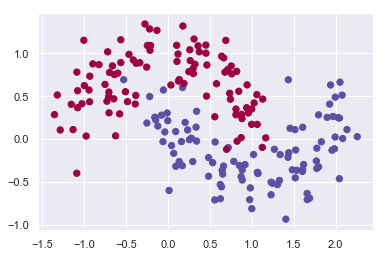

In [199]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# 手动生成一个随机的平面点分布，并画出来
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

### 咱们定义一个函数用来画我们分类结果的决策边界（也就是分界线）

In [200]:
# 咱们先顶一个一个函数来画决策边界
def plot_decision_boundary(pred_func):

    # 设定最大最小值，附加一点点边缘填充
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 用预测函数预测一下
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 然后画出图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

### 我们先用传统的逻辑回归来做一下分类，并画出判定边界

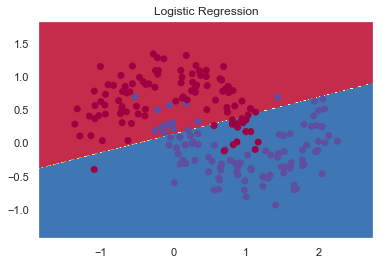

In [201]:
from sklearn.linear_model import LogisticRegressionCV
#咱们先来瞄一眼逻辑斯特回归对于它的分类效果
clf = LogisticRegressionCV()
clf.fit(X, y)
 
# 画一下决策边界
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

对于上面这样的结果很好理解，因为线性切分，决策边界是直线，这条直线只能尽量让某一类点落在某一侧，但是永远做不到真的完全切分

### 试试一个简单的人工神经网络
![](http://www.wildml.com/wp-content/uploads/2015/09/nn-from-scratch-3-layer-network.png)

$$
z_{1}=x W_{1}+b_{1}
$$
$$
a_{1}=\tanh \left(z_{1}\right)
$$
$$
z_{2}=a_{1} W_{2}+b_{2}
$$
$$
a_{2}=\hat{y}=\operatorname{softmax}\left(z_{2}\right)
$$
$$
W_{1} \in \mathbb{R}^{2 \times 500}
$$
$$
b_{1} \in \mathbb{R}^{500}
$$
$$
W_{2} \in \mathbb{R}^{500 \times 2}
$$
$$
b_{2} \in \mathbb{R}^{2}
$$

### 这是一个分类问题，因此我们用softmax分类器(LR的多分类)，并且用互熵损失作为损失函数

$$
L(y, \hat{y})=-\frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n, i} \log \hat{y}_{n, i}
$$

### BP计算梯度以便使用(随机)梯度下降

$$
\delta_{3}=\hat{y}-y
$$
$$
\delta_{2}=\left(1-\tanh ^{2} z_{1}\right) \circ \delta_{3} W_{2}^{T}
$$
$$
\frac{\partial L}{\partial W_{2}}=a_{1}^{T} \delta_{3}
$$
$$
\frac{\partial L}{\partial b_{2}}=\delta_{3}
$$
$$
\frac{\partial L}{\partial W_{1}}=x^{T} \delta 2
$$
$$
\frac{\partial L}{\partial b_{1}}=\delta 2
$$

In [202]:
num_examples = len(X) # 样本数
nn_input_dim = 2 # 输入的维度
nn_output_dim = 2 # 输出的类别个数
 
# 梯度下降参数
epsilon = 0.01 # 学习率
reg_lambda = 0.01 # 正则化参数

# 定义损失函数(才能用梯度下降啊...)
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 向前推进，前向运算
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # 计算损失
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # 也得加一下正则化项
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [203]:
# 完整的训练建模函数定义
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    '''
    参数：
    1) nn_hdim: 隐层节点个数
    2）num_passes: 梯度下降迭代次数
    3）print_loss: 设定为True的话，每1000次迭代输出一次loss的当前值
    '''
    # 随机初始化一下权重呗
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # 这是咱们最后学到的模型
    model = {}
     
    # 开始梯度下降...
    for i in range(0, num_passes):
 
        # 前向运算计算loss
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # 反向传播
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # 加上正则化项
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # 梯度下降更新参数
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # 得到的模型实际上就是这些权重
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # 如果设定print_loss了，那我们汇报一下中间状况
        if print_loss and i % 1000 == 0:
            print ("Loss after iteration %i: %f" %(i, calculate_loss(model)))
     
    return model

In [204]:
# 判定结果的函数
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 前向运算
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    # 计算概率输出最大概率对应的类别
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.069033
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


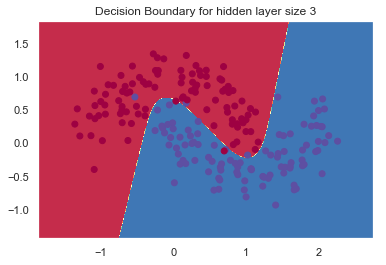

In [205]:
# 建立隐层有3个节点(神经元)的神经网络
model = build_model(3, print_loss=True)
 
# 然后再把决策/判定边界画出来
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

看到这样一个图，3个隐层的神经网络能够区分得还不错

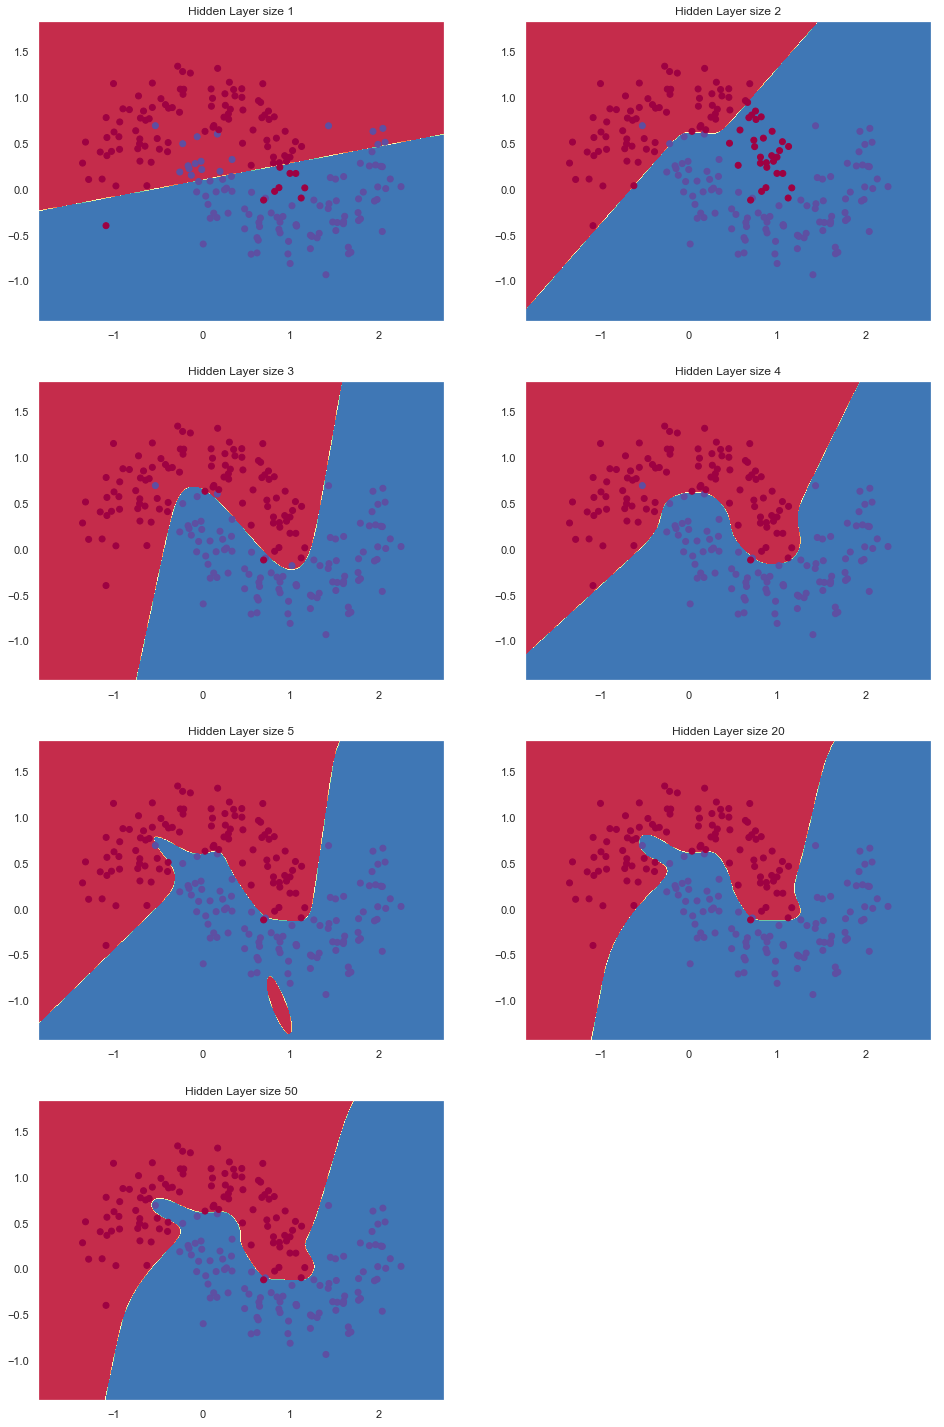

In [206]:
# 然后听闻你想知道不同的隐层节点个数对结果的影响？
# 那咱们来一起看看吧
plt.figure(figsize=(16, 32))
# 设定不同的隐层节点(神经元)个数
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

### 神经网络之Tensorflow示例

可以去看官网

### 分类与排序 

分类问题
* 样本量不算太大，试试SVM+kernel
  * 比如文本分类
* 样本量很大，试试对特征离散化+linearSVM/LR
* 如果样本量很大，连续值属性又很多，试试SNN/DNN

排序问题
* 不仅要区分01，还要知道接近01的程度
* 视作概率
* LR or NN (GBDT大部分时候也很好用) 

### 分类与排序

点击率预估问题
* BAT，FLAG最重视的问题之一
* 大部分情况下，广告靠点击赚钱，因此需要得到被点的概率后 做一个排序

实际电商的CTR预估问题参见课上案例 

### 思(mian)考(shi)题(ti)

* **LR和SVM的差别和优劣分别是什么？**

损失函数(Loss Function)不一样，LR可以理解为交叉熵，SVM是hinge loss

差别：LR可以产生概率，SVM产生概率需要支持向量到超平面距离做一个映射

优劣：LR简单，可解释性非常强。SVM比较慢，鲁棒性比较强。
* **你能举一个样本的例子，来说明LR和SVM分类时候的不同吗？**
<img src='724_u.png'>
如果样本分布是这样的形状，那么LR和SVM分类都是一样的
<img src='724_c.png'>
如果样本点是这样分布的话，LR考虑的是概率，它会沿着两边样本点的重心来做分割，SVM只跟它的支持向量有关。由此可以看出SVM的鲁棒性(容错能力)更强

* **SVM的kernel一般怎么选择？**

如果数据量不是很大，可以用rbf，但是要加一些正则化，避免过拟合;如果数据量非常大，把特征离散化拉伸维度，用linear的SVM。

* **神经网络的优劣是什么？**

优点：学习能力非常强，劣势是黑盒，不知道物理含义，可调性不高。

* **神经网络应用有哪些需要注意的点？**

不要加太多的网络层和样本个数